In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [158]:
data = pd.read_csv("Downloads/adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [6]:
print(data.shape)

(48842, 15)


In [8]:
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [10]:
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)
data['native-country']=data['native-country'].replace('?',np.nan)

In [12]:
info = pd.DataFrame(data.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",data.isna().sum(),True)
info.insert(2,"Duplicate",data.duplicated().sum(),True)
info.insert(3,"Unique",data.nunique(),True)
info.insert(4,"Min",data.min(),True)
info.insert(5,"Max",data.max(),True)
info.T  

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
IsNa,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
Duplicate,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
Unique,74,8,28523,16,16,7,14,6,5,2,123,99,96,41,2
Min,17,NaN,12285,10th,1,Divorced,NaN,Husband,Amer-Indian-Eskimo,Female,0,0,1,NaN,<=50K
Max,90,NaN,1490400,Some-college,16,Widowed,NaN,Wife,White,Male,99999,4356,99,NaN,>50K


In [16]:
df = data.copy()

In [18]:
df.dropna(how='any',inplace=True)
df


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
df = df.drop_duplicates()
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [22]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [24]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1])

In [26]:
df1 = df.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1)

In [28]:
from sklearn import preprocessing

In [34]:
train_df, test_df = train_test_split(df1, test_size=0.2, random_state=123)
train_df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
27716,56,Federal-gov,155238,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,>50K
34819,36,Private,123983,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,55,Japan,>50K
6791,63,Local-gov,197189,Bachelors,Widowed,Prof-specialty,Not-in-family,White,Female,48,United-States,<=50K
30798,43,Self-emp-not-inc,32451,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
19250,27,Private,85625,Some-college,Never-married,Sales,Not-in-family,White,Male,20,United-States,<=50K


In [36]:
X_test_original = test_df.copy()

In [51]:
info = pd.DataFrame(X_test_original.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",X_test_original.isna().sum(),True)
info.insert(2,"Duplicate",X_test_original.duplicated().sum(),True)
info.insert(3,"Unique",X_test_original.nunique(),True)
info.insert(4,"Min",X_test_original.min(),True)
info.insert(5,"Max",X_test_original.max(),True)
info.T   

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,0,0,0,0,0,0,0,0,0,0,0,0
Unique,71,7,7769,16,7,14,6,5,2,85,40,2
Min,17,Federal-gov,13769,10th,Divorced,Adm-clerical,Husband,Amer-Indian-Eskimo,Female,1,Cambodia,<=50K
Max,90,Without-pay,1490400,Some-college,Widowed,Transport-moving,Wife,White,Male,99,Yugoslavia,>50K


In [42]:
cat_cols = [
    'gender', 'workclass', 'education', 'marital-status',
    'occupation', 'relationship', 'race', 'native-country',
    'income'
]

# 3. Create a LabelEncoder per column, fit on train, transform both
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    # fit on train
    train_df[col] = le.fit_transform(train_df[col])
    # use same encoder to transform test
    test_df[col] = le.transform(test_df[col])
    encoders[col] = le  # if you need them later


In [49]:
info = pd.DataFrame(train_df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",train_df.isna().sum(),True)
info.insert(2,"Duplicate",train_df.duplicated().sum(),True)
info.insert(3,"Unique",train_df.nunique(),True)
info.insert(4,"Min",train_df.min(),True)
info.insert(5,"Max",train_df.max(),True)
info.T   

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,6,6,6,6,6,6,6,6,6,6,6,6
Unique,74,7,23051,16,7,14,6,5,2,95,41,2
Min,17,0,13492,0,0,0,0,0,0,1,0,0
Max,90,6,1484705,15,6,13,5,4,1,99,40,1


In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

In [60]:
target_col = 'income'
X_train = train_df.drop(columns=[target_col]).values
y_train = train_df[target_col].values
X_test  = test_df.drop(columns=[target_col]).values
y_test  = test_df[target_col].values

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [66]:
n_features = X_train.shape[1]
# for sequence models reshape to (samples, timesteps, 1)
X_train_seq = X_train.reshape(-1, n_features, 1)
X_test_seq  = X_test.reshape(-1, n_features, 1)


In [84]:
mlp_bin = models.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')     # single‑unit sigmoid
])
mlp_bin.compile(
    loss='binary_crossentropy',               # for single‑sigmoid
    optimizer=optimizers.Adam(1e-3),
    metrics=['accuracy']
)



In [95]:
mlp_bin.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)


Epoch 1/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.8239 - loss: 0.3599 - val_accuracy: 0.8201 - val_loss: 0.3829
Epoch 2/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.8262 - loss: 0.3574 - val_accuracy: 0.8210 - val_loss: 0.3830
Epoch 3/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.8282 - loss: 0.3553 - val_accuracy: 0.8215 - val_loss: 0.3788
Epoch 4/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.8285 - loss: 0.3534 - val_accuracy: 0.8248 - val_loss: 0.3803
Epoch 5/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.8287 - loss: 0.3541 - val_accuracy: 0.8229 - val_loss: 0.3805
Epoch 6/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.8312 - loss: 0.3516 - val_accuracy: 0.8149 - val_loss: 0.3831
Epoch 7/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.8292 - loss: 0.3548 - val_accuracy: 0.8260 - val_loss: 0.3819
Epoch 8/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 

In [88]:
y_pred_probs = mlp_bin.predict(X_test).flatten()
y_pred_labels = (y_pred_probs > 0.5).astype(int)


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step


In [93]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8196


In [98]:
predictions_df = pd.DataFrame({'Predicted_Label': y_pred_labels})

In [100]:
merged_df = pd.concat([X_test_original.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)

In [106]:
merged_df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Predicted_Label
0,18,Private,336508,11th,Never-married,Adm-clerical,Own-child,White,Female,15,United-States,<=50K,0
1,41,Local-gov,168071,HS-grad,Divorced,Exec-managerial,Own-child,White,Male,45,United-States,<=50K,0
2,32,Private,317378,Bachelors,Never-married,Exec-managerial,Own-child,White,Female,40,United-States,>50K,0
3,59,Federal-gov,178660,Assoc-acdm,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,<=50K,1
4,27,Private,23940,HS-grad,Never-married,Handlers-cleaners,Other-relative,Amer-Indian-Eskimo,Male,40,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9030,40,Private,61287,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,<=50K,0
9031,29,Private,176027,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female,40,United-States,<=50K,0
9032,23,Private,199452,Some-college,Never-married,Other-service,Own-child,White,Female,40,United-States,<=50K,0
9033,20,Self-emp-inc,182200,HS-grad,Never-married,Machine-op-inspct,Own-child,White,Female,30,United-States,<=50K,0


In [131]:
merged_df.drop('income', axis=1, inplace=True)


In [133]:
merged_df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
marital-status     object
occupation         object
relationship       object
race               object
gender             object
hours-per-week      int64
native-country     object
Predicted_Label     int64
dtype: object

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, chi2_contingency

In [137]:
import pandas as pd
import numpy as np
# from scipy.stats import f_oneway, pearsonr
import matplotlib.pyplot as plt

In [139]:
categorical_features = ["workclass", "education", "marital-status","occupation","relationship","race","gender","native-country"]
target = "Predicted_Label"

In [141]:
numeric_features = [c for c in merged_df.columns 
    if c not in categorical_features and c != target]

In [143]:
numeric_features

['age', 'fnlwgt', 'hours-per-week']

In [145]:
def cramers_v(conf_mat):
    chi2, _, _, _ = chi2_contingency(conf_mat)
    n = conf_mat.values.sum()
    r, k = conf_mat.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

In [147]:
records = []

In [149]:
for feat in numeric_features:
    r, p = pointbiserialr(merged_df[feat], merged_df[target])
    if p < 0.05:
        records.append({'Feature': feat,
                'Type': 'numeric',
                'p_value': p,
                'effect_size': abs(r)
            })

for feat in categorical_features:
    conf = pd.crosstab(merged_df[feat], merged_df[target])
    chi2_stat, p, _, _ = chi2_contingency(conf)
    if p < 0.05:
        v = cramers_v(conf)
        records.append({'Feature': feat,
                'Type': 'categorical',
                'p_value': p,
                'effect_size': v
            })


In [151]:
if not records:
    print("No features reached p < 0.05.")
else:
    eff_df = pd.DataFrame(records)
    eff_df = eff_df.sort_values('effect_size', ascending=False).reset_index(drop=True)
    
    # 5. Display ranked features
    display(eff_df[['Feature', 'Type', 'p_value', 'effect_size']])

,Feature,Type,p_value,effect_size
0,relationship,categorical,0.000000e+00,0.535163
1,marital-status,categorical,0.000000e+00,0.529171
2,education,categorical,0.000000e+00,0.415663
3,occupation,categorical,5.800259e-195,0.324434
4,age,numeric,5.150938e-124,0.245392
5,hours-per-week,numeric,2.217198e-108,0.229588
6,gender,categorical,1.959403e-95,0.218063
7,workclass,categorical,1.072190e-49,0.164122
8,native-country,categorical,1.209726e-06,0.102820
9,race,categorical,3.464412e-12,0.081242


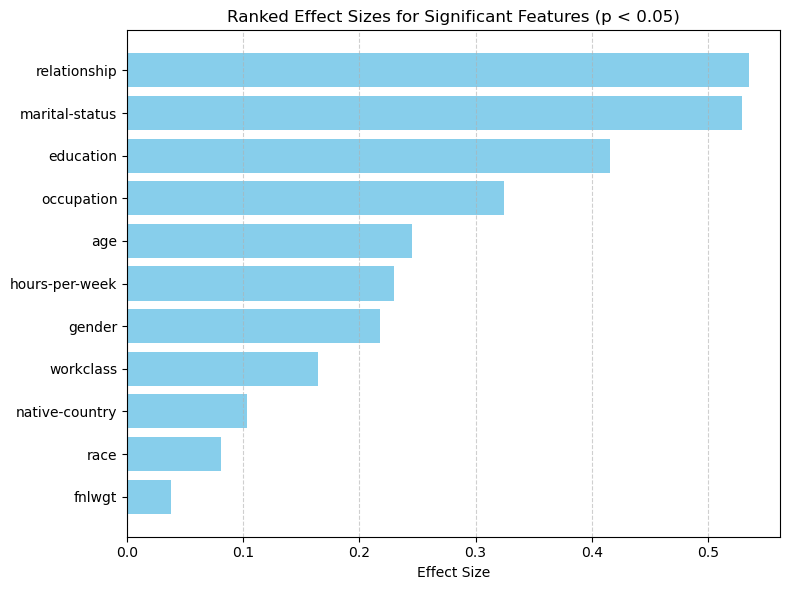

In [156]:
plt.figure(figsize=(8, 6))
plt.barh(eff_df['Feature'], eff_df['effect_size'], color='skyblue')
plt.xlabel("Effect Size")
plt.title("Ranked Effect Sizes for Significant Features (p < 0.05)")
plt.gca().invert_yaxis()  # largest effect at top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()